# ループ整形

次の制御対象を考える。これに対し、以下の３パターンの補償を施した場合を比較する ([2]の8章演習問題の問8を参照)。
$$
P(s) = \frac{1}{s(s + 1)}
$$

In [13]:
import numpy as np
from control.matlab import *
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
P1 = tf([0, 1], [1, 0])
P2 = tf([0, 1], [1, 1])
P = P1 * P2
print(P)


   1
-------
s^2 + s



#### 開ループ系のボード線図を確認

Text(0, 0.5, 'Phase [deg]')

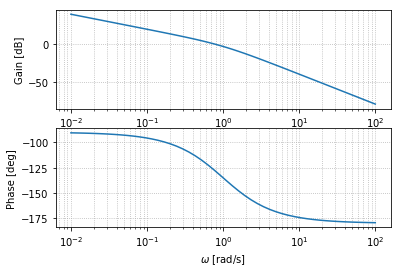

In [17]:
fig, ax = plt.subplots(2, 1)
gain, phase, w = bode(P, logspace(-2, 2), Plot=False)

ax[0].semilogx(w, 20*np.log10(gain))
ax[1].semilogx(w, phase*180/np.pi)

ax[0].grid(which='both', ls=':')
ax[0].set_ylabel('Gain [dB]')

ax[1].grid(which='both', ls=':')
ax[1].set_xlabel('$\omega$ [rad/s]')
ax[1].set_ylabel('Phase [deg]')

#### ゲイン余裕、位相余裕、位相交差周波数、ゲイン交差周波数

In [18]:
print('(GM, PM, wpc, wgc)')
print(margin(P))

(GM, PM, wpc, wgc)
(inf, 51.827292372987756, nan, 0.786151377757423)


## ゲイン補償
$$
K_1 = 10
$$

(GM, PM, wpc, wgc)
(inf, 17.964235916371365, nan, 3.0842328377167627)


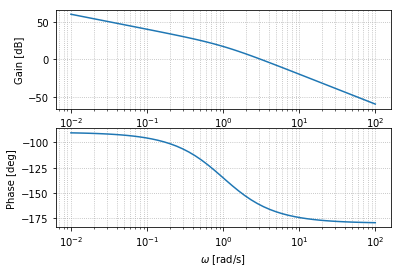

In [21]:
K1 = 10
H1 = K1 * P

fig, ax = plt.subplots(2, 1)
gain, phase, w = bode(H1, logspace(-2, 2), Plot=False)

ax[0].semilogx(w, 20*np.log10(gain))
ax[1].semilogx(w, phase*180/np.pi)

ax[0].grid(which='both', ls=':')
ax[0].set_ylabel('Gain [dB]')

ax[1].grid(which='both', ls=':')
ax[1].set_xlabel('$\omega$ [rad/s]')
ax[1].set_ylabel('Phase [deg]')

print('(GM, PM, wpc, wgc)')
print(margin(H1))

## 位相遅れ補償
$$
K_2(s) = K_1\frac{10s+1}{100s+1}
$$

(GM, PM, wpc, wgc)
(inf, 45.18515990602799, nan, 0.7906284678579607)


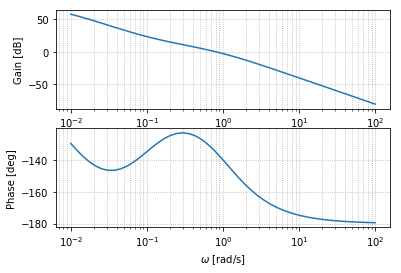

In [22]:
K2 = tf([10, 1], [100, 1]) * K1
H2 = K2 * P

fig, ax = plt.subplots(2, 1)
gain, phase, w = bode(H2, logspace(-2, 2), Plot=False)

ax[0].semilogx(w, 20*np.log10(gain))
ax[1].semilogx(w, phase*180/np.pi)

ax[0].grid(which='both', ls=':')
ax[0].set_ylabel('Gain [dB]')

ax[1].grid(which='both', ls=':')
ax[1].set_xlabel('$\omega$ [rad/s]')
ax[1].set_ylabel('Phase [deg]')

print('(GM, PM, wpc, wgc)')
print(margin(H2))

## 位相進み補償
$$
K_3(s) = K_1\frac{5s+10}{s+10}
$$

(GM, PM, wpc, wgc)
(inf, 53.54943401340705, nan, 4.784998346925868)


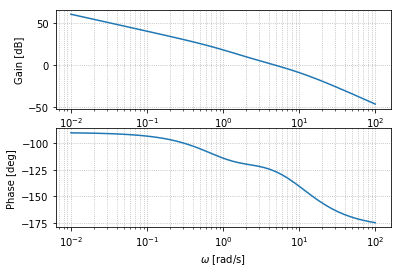

In [23]:
K3 = tf([5, 10], [1, 10]) * K1
H3 = K3 * P

fig, ax = plt.subplots(2, 1)
gain, phase, w = bode(H3, logspace(-2, 2), Plot=False)

ax[0].semilogx(w, 20*np.log10(gain))
ax[1].semilogx(w, phase*180/np.pi)

ax[0].grid(which='both', ls=':')
ax[0].set_ylabel('Gain [dB]')

ax[1].grid(which='both', ls=':')
ax[1].set_xlabel('$\omega$ [rad/s]')
ax[1].set_ylabel('Phase [deg]')

print('(GM, PM, wpc, wgc)')
print(margin(H3))

## 各パターンのボード線図を比較

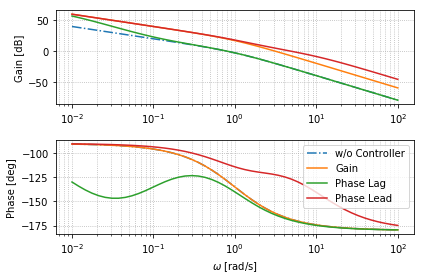

In [34]:
fig, ax = plt.subplots(2, 1)

gain, phase, w = bode(P, logspace(-2, 2), Plot=False)
ax[0].semilogx(w, 20*np.log10(gain), ls='-.', label='w/o Controller')
ax[1].semilogx(w, phase*180/np.pi, ls='-.', label='w/o Controller')

gain, phase, w = bode(H1, logspace(-2, 2), Plot=False)
ax[0].semilogx(w, 20*np.log10(gain), label='Gain')
ax[1].semilogx(w, phase*180/np.pi, label='Gain')

gain, phase, w = bode(H2, logspace(-2, 2), Plot=False)
ax[0].semilogx(w, 20*np.log10(gain), label='Phase Lag')
ax[1].semilogx(w, phase*180/np.pi, label='Phase Lag')

gain, phase, w = bode(H3, logspace(-2, 2), Plot=False)
ax[0].semilogx(w, 20*np.log10(gain), label='Phase Lead')
ax[1].semilogx(w, phase*180/np.pi, label='Phase Lead')

ax[0].grid(which='both', ls=':')
ax[0].set_ylabel('Gain [dB]')
ax[1].grid(which='both', ls=':')
ax[1].set_xlabel('$\omega$ [rad/s]')
ax[1].set_ylabel('Phase [deg]')
ax[1].legend()

fig.tight_layout()

## 各パターンにおける閉ループ系のステップ応答

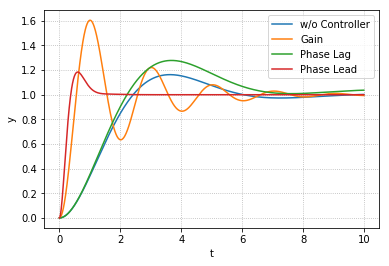

In [40]:
Gyr = feedback(P, 1)
Gyr1 = feedback(H1, 1)
Gyr2 = feedback(H2, 1)
Gyr3 = feedback(H3, 1)

fig, ax = plt.subplots()

y, t = step(Gyr, np.arange(0, 10, 0.01))
ax.plot(t, y, label='w/o Controller')

y, t = step(Gyr1, np.arange(0, 10, 0.01))
ax.plot(t, y, label='Gain')

y, t = step(Gyr2, np.arange(0, 10, 0.01))
ax.plot(t, y, label='Phase Lag')

y, t = step(Gyr3, np.arange(0, 10, 0.01))
ax.plot(t, y, label='Phase Lead')

ax.set_xlabel('t')
ax.set_ylabel('y')
ax.grid(ls=':')
ax.legend()

## 参考文献
[1] 南裕樹 (2019) 『Pythonによる制御工学入門』 オーム社  
[2] 杉江俊治・藤田政之 (1999) 『フィードバック制御入門』 コロナ社